# Different Regression

1. Gradient descent to minimize the sum of the squares
2. Solving directly the sum the squares
3. Gradient descent to minimize the sum of the absolute values
4. Gradient descent to minimize the quadratic regression
5. Pots of all regression together

### Imports

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from minimization import *

### Data set

In [90]:
data = {
    'Size': [1500, 2000, 1200, 1800, 2200, 1600, 2500, 1900, 1700],
    'Age': [5, 10, 2, 8, 15, 3, 20, 12, 7],
    'Price': [300, 350, 250, 320, 380, 290, 400, 340, 310]
}

df = pd.DataFrame(data)
print(df)


   Size  Age  Price
0  1500    5    300
1  2000   10    350
2  1200    2    250
3  1800    8    320
4  2200   15    380
5  1600    3    290
6  2500   20    400
7  1900   12    340
8  1700    7    310


In [91]:
Xdata = df[['Age']].values.flatten()
ydata = df['Price'].values
ydata,Xdata

(array([300, 350, 250, 320, 380, 290, 400, 340, 310]),
 array([ 5, 10,  2,  8, 15,  3, 20, 12,  7]))

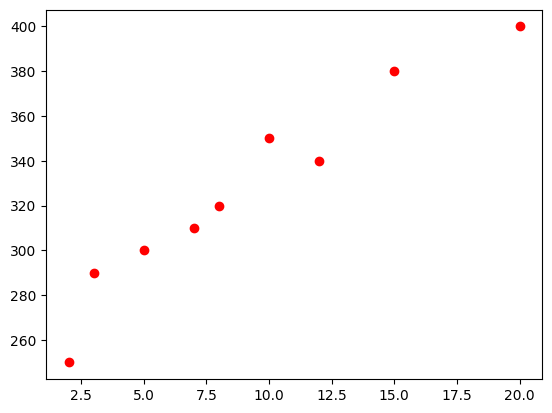

In [92]:
# plt.scatter(df['Size'], df['Price'], color='blue', label='Size vs Price')
# plt.scatter(df['Age'], df['Price'], color='red', label='Age vs Price')
plt.scatter(Xdata, ydata, color='red', label='Age vs Price')

## 1 .Gradient Descent to minimize the sum fo the squares

$$F(m,b) = \frac{1}{N}\sum_{i=1}^N |ydata_i - (m\cdot Xdata_i +b)|^2$$
we will pick 
$$x=[m,b]$$
therefore
$$DF(x,b) =  \begin{bmatrix}-\frac{2}{N}\sum_{i=1}^N Xdata_i\cdot(ydata_i - (m\cdot Xdata_i +b))\\ -\frac{2}{N}\sum_{i=1}^N (ydata_i - (m\cdot Xdata_i +b)) \end{bmatrix}$$

In [122]:
#Define the functions
N = 9

def F(x):
    return 1/N*np.sum((ydata - (x[0]*Xdata + x[1]))**2)

def DF(x):
    return np.array([
        -2/N*np.sum((ydata - (x[0]*Xdata + x[1]))*Xdata),
        -2/N*np.sum(ydata - (x[0]*Xdata + x[1]))    
    ])
    

In [94]:
r = GD(DF, np.array([50/2.5,260]), alpha=0.001, tol=1E-6, itmax=100000)
print("Results = ", r)

Results =  (array([  7.67100962, 256.77524617]), np.float64(9.995226481155255e-07), 26295)


In [95]:
m1=r[0][0]
b1=r[0][1]
print(m,b)
print(F([m1,b1]),F([50/2.5,260]))
print(DF([m1,b1]),DF([50/2.5,260]))

7.534078761965777 258.47453751873593
126.8910604415502 18088.888888888887
[-8.02823605e-08  9.96293263e-07] [2853.33333333  231.11111111]


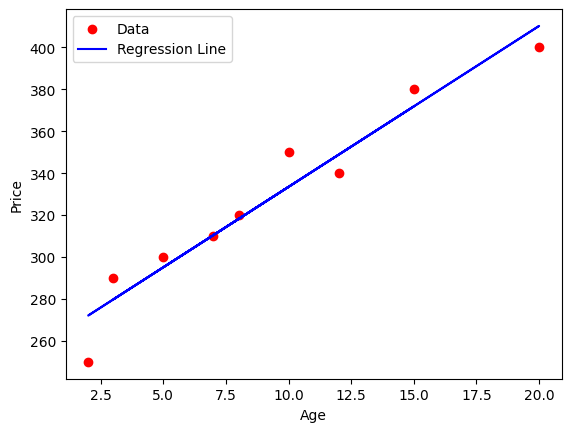

In [96]:
plt.scatter(Xdata, ydata, color='red', label='Data')
plt.plot(Xdata, m1*Xdata + b1, color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

## 2. Solving the gradient of the sum of the square = 0

Same as before
$$F(m,b) = \frac{1}{N}\sum_{i=1}^N |ydata_i - (m\cdot Xdata_i +b)|^2$$

and
$$x=[m,b]$$

Then
$$DF(x,b) =  [ -\frac{2}{N}\sum_{i=1}^N Xdata_i\cdot(ydata_i - (m\cdot Xdata_i +b)), -\frac{2}{N}\sum_{i=1}^N(ydata_i - (m\cdot Xdata_i +b))$$

and we solve
$$DF(m,b) = 0 \Longleftrightarrow \begin{bmatrix} A\cdot[m,b]= v \end{bmatrix}$$

where
$$\mathbf{A} = \begin{bmatrix}
\frac{2}{N}\sum Xdata_i^2 & \frac{2}{N}\sum Xdata_i \\
\frac{2}{N}\sum Xdata_i & 2
\end{bmatrix}, v =  \begin{bmatrix}
\frac{2}{N}\sum (ydata_i \cdot Xdata_i) \\
\frac{2}{N}\sum (ydata_i)
\end{bmatrix}$$

In [97]:
N=9

def F(x):
    return 1/N*np.sum((ydata - (x[0]*Xdata + x[1]))**2)

def DF(x):
    return np.array([
        -2/N*np.sum((ydata - (x[0]*Xdata + x[1]))*Xdata),
        -2/N*np.sum(ydata - (x[0]*Xdata + x[1]))    
    ])

A=np.array([
        [2/N*np.sum(Xdata**2), 2/N*np.sum(Xdata)],
        [2/N*np.sum(Xdata), 2]
    ])
v = np.array([
        2/N*np.sum(ydata*Xdata),
        2/N*np.sum(ydata)
    ])

# Solving A*[m,b] = v
from scipy import linalg
r2 = linalg.solve(A, v)
r2

array([  7.67100977, 256.7752443 ])

In [101]:
m2=r2[0]
b2=r2[1]
m2,b2

(np.float64(7.671009771986974), np.float64(256.7752442996742))

In [102]:
np.dot(A, r2), v

(array([6417.77777778,  653.33333333]), array([6417.77777778,  653.33333333]))

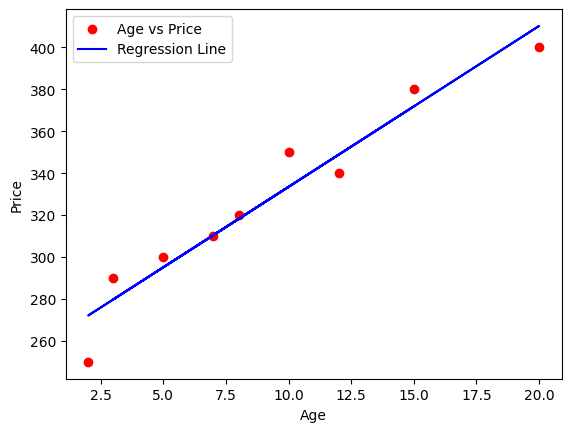

In [103]:
plt.scatter(Xdata, ydata, color='red', label='Age vs Price')
plt.plot(Xdata, m2*Xdata + b2, color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

## 3 .Gradient Descent to minimize the sum of the absolute values

$$F(m,b) = \frac{1}{N}\sum_{i=1}^N |ydata_i - (m\cdot Xdata_i +b)|$$

we will pick 
$$x=[m,b]$$

therefore
$$DF(x,b) =  [ -\frac{2}{N}\sum_{i=1}^N Xdata_i\cdot\text{sign}(ydata_i - (m\cdot Xdata_i +b)), -\frac{2}{N}\sum_{i=1}^N \text{sign}(ydata_i - (m\cdot Xdata_i +b))$$

In [109]:
N = 9

def F(x):
    return 1/N*np.sum(np.abs(ydata - (x[0]*Xdata + x[1])))

def DF(x):
    return np.array([
        -2/N*np.sum(np.sign(ydata - (x[0]*Xdata + x[1]))*Xdata),
        -2/N*np.sum(np.sign(ydata - (x[0]*Xdata + x[1]))) 
    ])

In [110]:
r = GD(DF, [100,260], alpha=0.05, tol=1E-6, itmax=100000)
r

(array([  6.68888889, 266.48888889]), np.float64(3.5624932315291993), 99999)

In [111]:
m3=r[0][0]
b3=r[0][1]

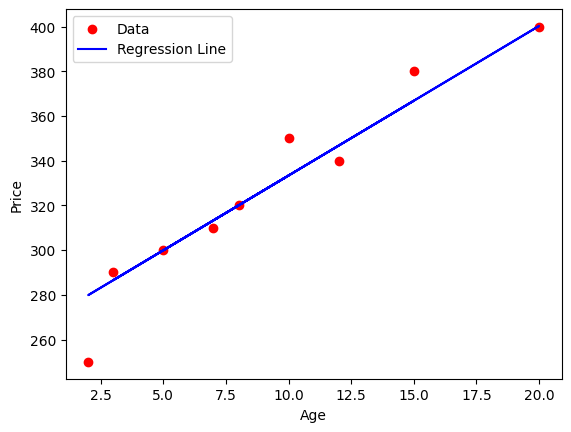

In [112]:
plt.scatter(Xdata, ydata, color='red', label='Data')
plt.plot(Xdata, m3*Xdata + b3, color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

## 4. Quadratic Regression

$$F(m,b) = \frac{1}{N}\sum_{i=1}^N |ydata_i - (m_2\cdot Xdata_i^2 +m_1\cdot Xdata_i +b)|^2$$

we will pick 
$$x=[m2,m1,b]$$

therefore
$$DF(x,b) =  \begin{bmatrix}-\frac{2}{N}\sum_{i=1}^N Xdata_i^2\cdot(ydata_i - (m_2\cdot Xdata_i^2 +m_1\cdot Xdata_i +b) \\  -\frac{2}{N}\sum_{i=1}^N Xdata_i\cdot(ydata_i - (m_2\cdot Xdata_i^2 +m_1\cdot Xdata_i +b))\\ -\frac{2}{N}\sum_{i=1}^N (ydata_i - (m_2\cdot Xdata_i^2 +m_1\cdot Xdata_i +b))\end{bmatrix}$$

In [132]:
#Define the functions
N = 9

def F(x):
    return 1/N*np.sum((ydata - (x[0]*Xdata**2 + x[1]*Xdata  + x[2]))**2)

def DF(x):
    return np.array([
        -2/N*np.sum((ydata - (x[0]*Xdata**2 + x[1]*Xdata  + x[2]))*Xdata**2),
        -2/N*np.sum((ydata - (x[0]*Xdata**2 + x[1]*Xdata  + x[2]))*Xdata),
        -2/N*np.sum(ydata - (x[0]*Xdata**2 + x[1]*Xdata  + x[2]))    
    ])
    

In [139]:
r = GD(DF, [0,100,260], alpha=1E-6, tol=1E-6, itmax=1000000)
r

(array([-1.83529717e-01,  1.15673770e+01,  2.42143350e+02]),
 np.float64(0.13932537279987176),
 999999)

In [140]:
m4_2=r[0][0]
m4_1=r[0][1]
b4=r[0][2]

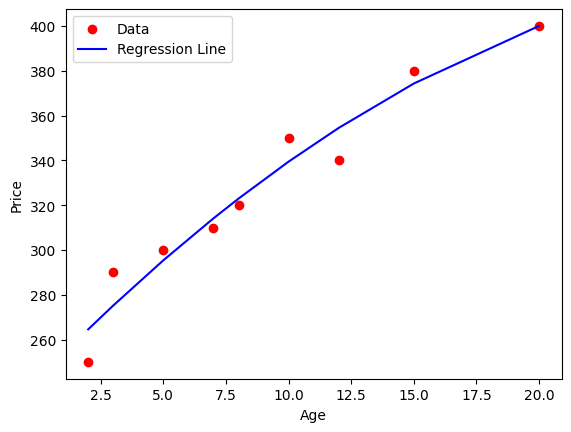

In [142]:
plt.scatter(Xdata, ydata, color='red', label='Data')
plt.plot(np.sort(Xdata), m4_2*np.sort(Xdata)**2 + m4_1*np.sort(Xdata) + b4, color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()

## 5 .All 3 plots together

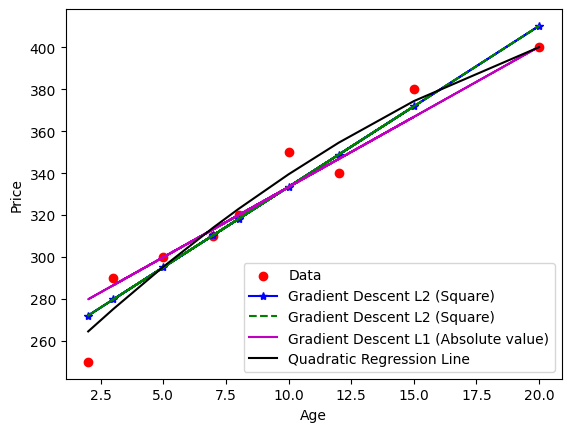

In [146]:
plt.scatter(Xdata, ydata, color='red', label='Data')
plt.plot(Xdata, m1*Xdata + b1, 'b*-', label='Gradient Descent L2 (Square)')
plt.plot(Xdata, m2*Xdata + b2, 'g--', label='Gradient Descent L2 (Square)')
plt.plot(Xdata, m3*Xdata + b3, 'm', label='Gradient Descent L1 (Absolute value)')
plt.plot(np.sort(Xdata), m4_2*np.sort(Xdata)**2 + m4_1*np.sort(Xdata) + b4, 'k', label='Quadratic Regression Line')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()